In [1]:
# Imports & Constant Variables
import time
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
max_iterations = 1000
tol = 1e-15
equations = ["x^2 - x - 1", "3x^2 - 3x - 1", "8x^2 - 8x - 1", "x^3 - x^2 - x - 1", "2x^3 - 2x^2 - 2x - 1", "7x^3 - 7x^2 - 7x - 1"]
solutions = [-0.618033988749894, 1.618033988749894,
             -0.263762615825973, 1.263762615825973,
             -0.112372435695794, 1.112372435695794,
             1.839286755214161, None, None,
             1.739907874377572, None, None,
             -0.473952458199156, -0.182018097012207, 1.655970555211363]

In [3]:
# Creating A Graph Function To Easily Graph Results
def graph(plot, equation, y, answer):
    plot.title.set_text(equation)
    plot.set_xlabel("Iterations")
    plot.set_ylabel("Root Predicted")
    plot.plot([i for i in range(len(y))], y)
    plot.plot(len(y)-1, answer, marker="x", markersize=20, markeredgecolor="red")

def record_results(method, f, p0, p1, p2, tolerance, max_iter, table, graph, equation, solution):
    # Calculate Results
    if p2:
        outcome, output, iterations, path, t = method(f, p0, p1, p2, tolerance, max_iter)
    elif p1:
        outcome, output, iterations, path, t = method(f, p0, p1, tolerance, max_iter)
    else:
        outcome, output, iterations, path, t = method(f, p0, tolerance, max_iter)

    if method == fixed_point_iteration:
        graph.scatter([i for i in range(len(path))], path, s=10)
        graph.plot(len(path) - 1, solution, marker="x", markersize=20, markeredgecolor="red")
        return

    # Store Results In Table
    table.append(outcome)
    table.append(output)
    table.append(abs(output-solutions[0]))
    table.append(iterations)
    table.append(t)

    # Graph Results
    graph(graph, equation, path, solution)

OverflowError: (34, 'Result too large')

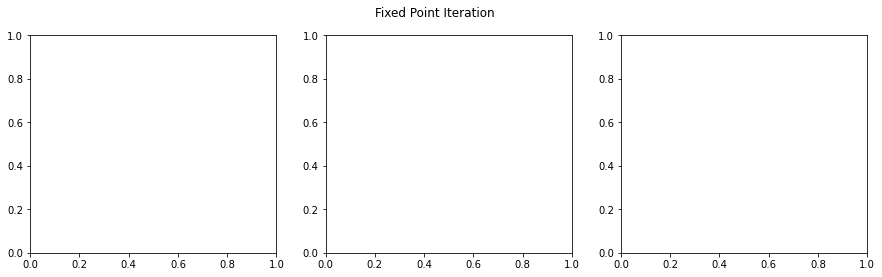

In [4]:
# Fixed Point Iteration Method
def fixed_point_iteration(f, p0, tolerance, max_iter):
    start = time.time()
    progress = []
    for i in range(1, max_iter):
        p = f(p0)
        progress.append(p)
        if abs(p-p0) < tolerance:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

# Testing Fixed Point Iteration With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle("Fixed Point Iteration")
record_results(fixed_point_iteration, lambda x:x**2-x-1, 6.61, None, None, 1e-5, max_iterations, results, ax[0], equations[0], solutions[1])
print("Actual Roots: x≈-0.61803 OR x≈1.6180")
record_results(fixed_point_iteration, lambda x:3*x**2-3*x-1, 6.31, None, None, 1e-5, 5, results, ax[1], equations[1], solutions[1])
print("Actual Roots: x≈-0.26376 OR x≈1.2638")
record_results(fixed_point_iteration, lambda x:8*x**2-8*x-1, 5.69, None, None, 1e-5, 5, results, ax[2], equations[2], solutions[2])
print("Actual Roots: x≈-0.11237 OR x≈1.1124")
# Forced to use constant iterations otherwise the number would get too big and give an overflow error - clearly this method is not up to par

The Fixed Point iteration may be easier to understand but not really reliable. This method is very hit or miss. The scatter plot above shows that the fixed iteration point can get close
sometimes but most times it is very different from the actual root.

In [ ]:
def newton(f, p0, tolerance, max_iter):
    start = time.time()
    progress = []
    for i in range(1, max_iter):
        progress.append(p0)
        p1 = p0 - f(p0) / misc.derivative(f, p0)
        if abs(p1 - p0) < tolerance:
            end = time.time()
            return "Success", p0, i, progress, end-start
        p0 = p1
    end = time.time()
    return p0, max_iter, progress, end-start

# Testing Newton's Method With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
record_results(newton, lambda x: x ** 2 - x - 1, -5.6, None, None, tol, max_iterations, results, ax[0], equations[0], solutions[0])
record_results(newton, lambda x: 3 * x ** 2 - 3 * x - 1, -5.26, None, None, tol, max_iterations, results, ax[1], equations[1], solutions[2])
record_results(newton, lambda x: 8 * x ** 2 - 8 * x - 1, -5.11, None, None, tol, max_iterations, results, ax[2], equations[2], solutions[4])
plt.show()

# Testing Newton's Method With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15, 4))  # my screen may be too big
record_results(newton, lambda x: x ** 3 - x ** 2 - x - 1, 6.61, None, None, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(newton, lambda x: 2 * x ** 3 - 2 * x ** 2 - 2 * x - 1, 6.31, None, None, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(newton, lambda x: 7 * x ** 3 - 7 * x ** 2 - 7 * x - 1, 5.69, None, None, tol, max_iterations, results, ax[2], equations[5], solutions[14])
# After 14 iterations the rightmost graph gets a overflow error because the method's prediction was a number that is bigger than what is allowed in python.
# Therefore we show 14 iterations of the graph to show how the path of the prediction went previous to the overflow error event
#plt.show()

# Newton's Method Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()
# The rightmost part of the table has been fixed to 14 iterations bc overflow error - method is too far from convergence to be continued

In [ ]:
# Steffensen's Method
def steffensen(f, p0, tolerance, max_iter):
    start = time.time()
    progress = []
    for i in range(1, max_iter):
        p1 = p0 + f(p0)
        p2 = p1 + f(p1)
        p = p0 - ((p1 - p0)*(p1-p0))/(p2 - (2*p1) + p0)
        progress.append(p)
        if abs(p - p0) < tolerance:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

# Testing Steffensen's Method With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
record_results(steffensen, lambda x:x**2-x-1, -5.6, None, None, tol, max_iterations, results, ax[0], equations[0], solutions[0])
record_results(steffensen, lambda x:3*x**2-3*x-1, -5.3, None, None, tol, max_iterations, results, ax[1], equations[1], solutions[2])
record_results(steffensen, lambda x:8*x**2-8*x-1, -5.11, None, None, tol, max_iterations, results, ax[2], equations[2], solutions[4])
plt.show()

# Testing Steffensen's Method With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15,4)) # my screen may be too big
record_results(steffensen, lambda x:x**3-x**2-x-1, 6.61, None, None, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(steffensen, lambda x:2*x**3-2*x**2-2*x-1, 6.31, None, None, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(steffensen, lambda x:7*x**3-7*x**2-7*x-1, 5.69, None, None, tol, max_iterations, results, ax[2], equations[5], solutions[12])
plt.show()

# Steffensen's Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [ ]:
# Bisection Method
def bisection(f, p0, p1, tolerance, max_iter):
    start = time.time()
    progress = []
    p = p0
    fa = f(p)
    for i in range(1, max_iter):
        p = p0 + (p1-p0)/2
        progress.append(p)
        fp = f(p)
        if (fp == 0) | ((p1-p0)/2 < tolerance):
            end =  time.time()
            return "Success", p, i, progress, end-start
        if fa * fp > 0:
            p0 = p
            fa = fp
        else:
            p1 = p
    end =  time.time()
    return "Failure", p, max_iter, progress, end-start

# Testing Bisection Method With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
record_results(bisection, lambda x:x**2-x-1, -5.61, 6.61, None, tol, max_iterations, results, ax[0], equations[0], solutions[0])
record_results(bisection, lambda x:3*x**2-3*x-1, -5.26, 6.26, None, tol, max_iterations, results, ax[1], equations[1], solutions[2])
record_results(bisection, lambda x:8*x**2-8*x-1, -5.11, 6.11, None, tol, max_iterations, results, ax[2], equations[2], solutions[4])
plt.show()

# Testing Bisection Method With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15,4)) # my screen may be too big
record_results(bisection, lambda x:x**3-x**2-x-1, -5.61, 6.61, None, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(bisection, lambda x:2*x**3-2*x**2-2*x-1, -5.56, 6.31, None, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(bisection, lambda x:7*x**3-2*x**7-7*x-1, -5.41, 5.69, None, tol, max_iterations, results, ax[2], equations[5], solutions[13])
plt.show()

# Bisection Method Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [ ]:
# Secant Method
def secant(f, p0, p1, tolerance, max_iter):
    start = time.time()
    progress = []
    q0 = f(p0)
    q1 = f(p1)
    for i in range(2, max_iter):
        p = p1 - (q1*(p1-p0))/(q1-q0)
        progress.append(p)
        if abs(p - p1) < tolerance:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

# Testing Secant Method With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
record_results(secant, lambda x:x**2-x-1, -5.6, 6.61, None, tol, max_iterations, results, ax[0], equations[0], solutions[0])
record_results(secant, lambda x:3*x**2-3*x-1, -5.26, 6.26, None, tol, max_iterations, results, ax[1], equations[1], solutions[1])
record_results(secant, lambda x:8*x**2-8*x-1, -5.11, 6.11, None, tol, max_iterations, results, ax[2], equations[2], solutions[2])
plt.show()

# Testing Secant Method With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15,4)) # my screen may be too big
record_results(secant, lambda x:x**3-x**2-x-1, -5.61, 6.61, None, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(secant, lambda x:2*x**3-2*x**2-2*x-1, -5.56, 6.31, None, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(secant, lambda x:7*x**3-7*x**2-7*x-1, -5.41, 5.69, None, tol, max_iterations, results, ax[2], equations[5], solutions[12])
plt.show()

# Secant Method Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [ ]:
# False Position Method
def false_position(f, p0, p1, tolerance, max_iter):
    start = time.time()
    progress = []
    q0 = f(p0)
    q1 = f(p1)
    for i in range(2, max_iter):
        p = p1 - q1*(p1 - p0)/(q1 - q0)
        progress.append(p)
        if abs(p - p1) < tolerance:
            end = time.time()
            return "Success", p, i, progress, end-start
        q = f(p)
        if q * q1 < 0:
            p0 = p1
            q0 = q1
        p1 = p
        q1 = q
    end = time.time()
    return "Failure", p, i, progress, end-start

# Testing False Position With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
record_results(false_position, lambda x:x**2-x-1, -5.6, 6.61, None, tol, max_iterations, results, ax[0], equations[0], solutions[0])
record_results(false_position, lambda x:3*x**2-3*x-1, -5.3, 6.26, None, tol, max_iterations, results, ax[1], equations[1], solutions[2])
record_results(false_position, lambda x:8*x**2-8*x-1, -5.11, 6.11, None, tol, max_iterations, results, ax[2], equations[2], solutions[4])
plt.show()

# Testing False Position With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15,4)) # my screen may be too big
record_results(false_position, lambda x:x**3-x**2-x-1, -5.61, 6.61, None, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(false_position, lambda x:2*x**3-2*x**2-2*x-1, -5.56, 6.31, None, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(false_position, lambda x:7*x**3-7*x**2-7*x-1, -5.41, 5.69, None, tol, max_iterations, results, ax[2], equations[5], solutions[14])
plt.show()

# False Position Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [ ]:
# Brent's Method - Combines Bisection & Inverse Quadratic
def brent(f, p0, p1, tolerance, max_iter):
    start = time.time()
    progress = []
    if abs(f(p0)) < abs(f(p1)):
        p0, p1 = p1, p0
    p2, fp2 = p0, f(p0)
    flag = True
    for i in range(max_iter):
        progress.append(p1)
        if abs(p1-p0) > tolerance:
            if (f(p0)) != fp2 and f(p1) != fp2:
                l0 = (p0 * f(p1) * fp2) / (((f(p0)) - f(p1)) * ((f(p0)) - fp2))
                l1 = (p1 * (f(p0)) * fp2) / ((f(p1) - (f(p0))) * (f(p1) - fp2))
                l2 = (p2 * f(p1) * (f(p0))) / ((fp2 - (f(p0))) * (fp2 - f(p1)))
                new = l0 + l1 + l2
            else:
                new = p1 - ( (f(p1) * (p1 - p0)) / (f(p1) - (f(p0))) )
            if ((new < ((3 * p0 + p1) / 4) or new > p1) or
                    (flag == True and (abs(new - p1)) >= (abs(p1 - p2) / 2)) or
                    (flag == False and (abs(new - p1)) >= (abs(p2 - d) / 2)) or
                    (flag == True and (abs(p1 - p2)) < tolerance) or
                    (flag == False and (abs(p2 - d)) < tolerance)):
                new = (p0 + p1) / 2
                flag = True
            else:
                flag = False
            d, p2 = p2, p1
            if ((f(p0)) * f(new)) < 0:
                p1 = new
            else:
                p0 = new
            if abs((f(p0))) < abs(f(p1)):
                p0, p1 = p1, p0
        else:
            end = time.time()
            return "Success", p1, i, progress, end-start
    end = time.time()
    return "Failure", p1, max_iter, progress, end-start

# Testing Brent's Method With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
record_results(brent, lambda x:x**2-x-1, -5.6, 6.61, None, tol, max_iterations, results, ax[0], equations[0], solutions[1])
record_results(brent, lambda x:3*x**2-3*x-1, -5.3, 6.26, None, tol, max_iterations, results, ax[1], equations[1], solutions[2])
record_results(brent, lambda x:8*x**2-8*x-1, -5.11, 6.11, None, tol, max_iterations, results, ax[2], equations[2], solutions[5])
plt.show()

# Testing Brent's Method With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15,4)) # my screen may be too big
record_results(brent, lambda x:x**3-x**2-x-1, -5.61, 6.61, None, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(brent, lambda x:2*x**3-2*x**2-2*x-1, -5.56, 6.31, None, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(brent, lambda x:7*x**3-7*x**2-7*x-1, -5.41, 5.69, None, tol, max_iterations, results, ax[2], equations[5], solutions[14])
plt.show()

# Brent's Method Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [ ]:
# Inverse Quadratic - Similar to the Secant Method / A derivation from the Secant Method
def inverse_quadratic(f, x0, x1, x2, tolerance, max_iter):
    start = time.time()
    progress = []
    for i in range(max_iter):
        if abs(x1-x0) > tolerance: # last guess and new guess are v close
            l0 = (x0 * f(x1) * f(x2)) / ((f(x0) - f(x1)) * (f(x0) - f(x2)))
            l1 = (x1 * f(x0) * f(x2)) / ((f(x1) - f(x0)) * (f(x1) - f(x2)))
            l2 = (x2 * f(x1) * f(x0)) / ((f(x2) - f(x0)) * (f(x2) - f(x1)))
            new = l0 + l1 + l2
            x0, x1, x2 = new, x0, x1
            progress.append(x0)
        else:
            end = time.time()
            return "Success", x0, i, progress, end-start
    end = time.time()
    return "Failure", x0, max_iter, progress, end-start

# Testing Inverse Quadratics Method With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
record_results(inverse_quadratic, lambda x:x**2-x-1, -5.6, .6, 6.61, tol, max_iterations, results, ax[0], equations[0], solutions[0])
record_results(inverse_quadratic, lambda x:3*x**2-3*x-1, -5.3, .26, 6.26, tol, max_iterations, results, ax[1], equations[2], solutions[2])
record_results(inverse_quadratic, lambda x:8*x**2-8*x-1, -5.11, .11, 6.11, tol, max_iterations, results, ax[2], equations[3], solutions[3])
plt.show()

# Testing Inverse Quadratic Method With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15,4)) # my screen may be too big
record_results(inverse_quadratic, lambda x:x**3-x**2-x-1, -5.61, .61, 6.61, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(inverse_quadratic, lambda x:2*x**3-2*x**2-2*x-1, -5.56, .43, 6.31, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(inverse_quadratic, lambda x:7*x**3-7*x**2-7*x-1, -5.41, .54, 5.69, tol, max_iterations, results, ax[2], equations[5], solutions[13])
plt.show()

# Inverse Quadratic Method Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [ ]:
# Muller's Method
def muller(f, p0, p1, p2, tolerance, max_iter):
    start = time.time()
    progress = []
    h1 = p1 - p0
    h2 = p2-p1
    g1 = (f(p1) - f(p0))/h1
    g2 = (f(p2) - f(p1))/h2
    d = (g1 - g2)/(h2+h1)
    for i in range(3, max_iter):
        b = g2 + h2*d
        d2 = (b**2 - 4*f(p2)*d)**1/2
        if abs(b-d2) < abs(b+d2):
            e2 = b + d2
        else:
            e2 = b - d2
        h = -2*f(p2)/e2
        p = p2+h
        progress.append(p)
        if abs(h) < tolerance:
            end = time.time()
            return "Success", p, i, progress, end-start
        p0 = p1
        p1 = p2
        p2 = p
        h1 = p1 - p0
        h2 = p2 - p1
        g1 = (f(p1)-f(p0))/h1
        g2 = (f(p2)-f(p1))/h2
        d = (g2 - g1)/(h2+h1)
    end = time.time()
    return "Failure", p, max_iter, progress, end-start

# Testing Muller's Method With 2nd Degree Polynomials
results = []
fig, ax = plt.subplots(1, 3, figsize=(15,4))
record_results(muller, lambda x:x**2-x-1, -5.6, .6, 6.61, tol, max_iterations, results, ax[0], equations[0], 1.618033988749894)
record_results(muller, lambda x:3*x**2-3*x-1, -5.3, .26, 6.26, tol, max_iterations, results, ax[1], equations[2], 1.263762615825973)
record_results(muller, lambda x:8*x**2-8*x-1, -5.11, .11, 6.11, tol, max_iterations, results, ax[2], equations[4], 1.112372435695794)
plt.show()

# Testing Inverse Quadratic Method With 3nd Degree Polynomials
fig, ax = plt.subplots(1, 3, figsize=(15,4)) # my screen may be too big
record_results(muller, lambda x:x**3-x**2-x-1, -5.61, .61, 6.61, tol, max_iterations, results, ax[0], equations[3], solutions[6])
record_results(muller, lambda x:2*x**3-2*x**2-2*x-1, -5.56, .43, 6.31, tol, max_iterations, results, ax[1], equations[4], solutions[9])
record_results(muller, lambda x:7*x**3-7*x**2-7*x-1, -5.41, .54, 5.69, tol, max_iterations, results, ax[2], equations[5], solutions[14])
plt.show()

# Muller's Table
fig, ax = plt.subplots(dpi=200, figsize = (6,1))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = pd.DataFrame({equations[0] : results[0:5], equations[1] : results[5: 10], equations[2] : results[10 : 15],
                   equations[3] : results[15 : 20], equations[4] : results[20:25], equations[5] : results[25:30]})
ax.table(cellText=df.values, rowLabels=["Outcome", "Output", "Error", "Iterations", "Time (seconds)"], colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

In [ ]:
# https://mpmath.org/doc/current/calculus/optimization.html <--- MUST CHECK has many equation
# Halley
# Illinois
# Pegasus
# Anderson
# Ridder

In [ ]:
# https://github.com/fredrik-johansson/mpmath/blob/c11db84b3237bd8fc6721f5a0c5d7c0c98a24dc1/mpmath/calculus/optimization.py#L341
def test(f, df, d2f, x):
    for i in range(max_iterations):
        prev = x
        fx = f(x)
        dfx = df(x)
        d2fx = d2f(x)
        x -=  2*fx*dfx / (2*dfx**2 - fx*d2fx)
        error = abs(x - prev)
        if f(x) < tol:
            return x, error
    return x, error

print(test(lambda x:x**2-x-1, lambda x:2*x-1, lambda x:2, 2.61))

In [ ]:
# https://github.com/fredrik-johansson/mpmath/blob/c11db84b3237bd8fc6721f5a0c5d7c0c98a24dc1/mpmath/calculus/optimization.py#L694